In [22]:
import pandas as pd

In [20]:
data=pd.read_csv('heart.csv')
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data['oldpeak']=data['oldpeak'].astype('float32')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float32
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float32(1), int64(13)
memory usage: 32.1 KB


In [7]:
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
#data integration
subset1=data[['age','cp','chol','thalachh']]
subset2=data[['exng','slp','output']]

In [11]:
concat_data=pd.concat([subset1,subset2],axis=1)

In [12]:
concat_data.head()

,age,cp,chol,thalachh,exng,slp,output
0,63,3,233,150,0,0,1
1,37,2,250,187,0,0,1
2,41,1,204,172,0,2,1
3,56,1,236,178,0,2,1
4,57,0,354,163,1,2,1


In [13]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [14]:
#data error corecting
def remove_outliers(column):
  Q1=column.quantile(0.25)
  Q3=column.quantile(0.75)
  IQR=Q3-Q1
  threshold=1.5*IQR
  outlier_mask=(column < Q1-threshold) | (column>Q3+threshold)
  return column[~outlier_mask]

In [15]:
col_name=['cp','thalachh','exng','oldpeak','slp','caa']
for col in col_name:
  data[col]=remove_outliers(data[col])

In [16]:
import matplotlib.pyplot as plt  

import seaborn as sns


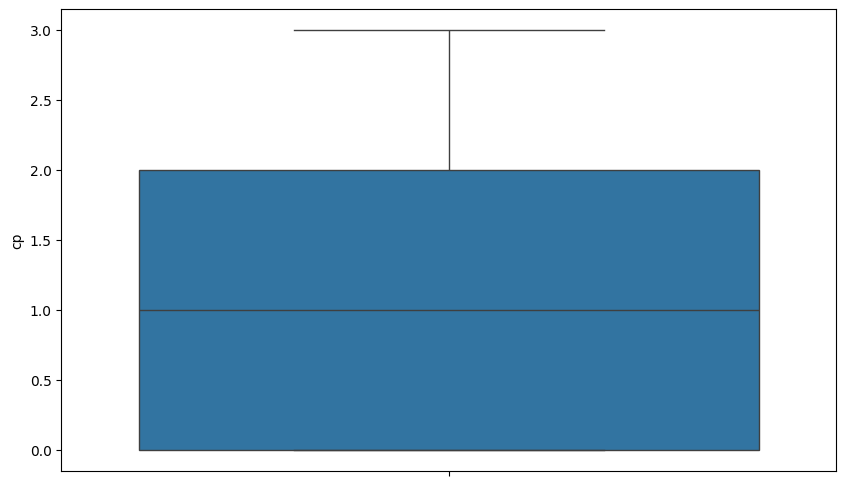

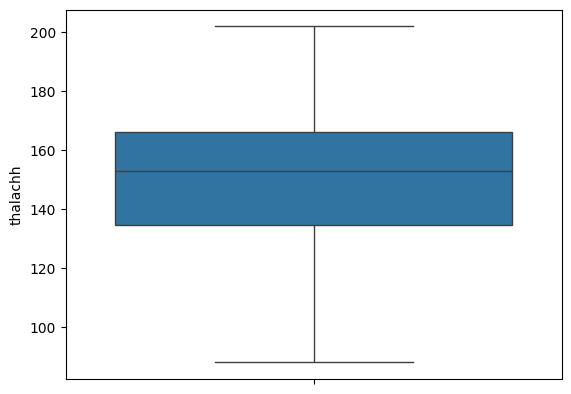

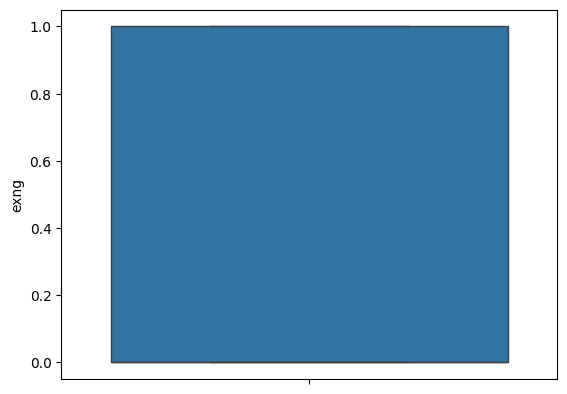

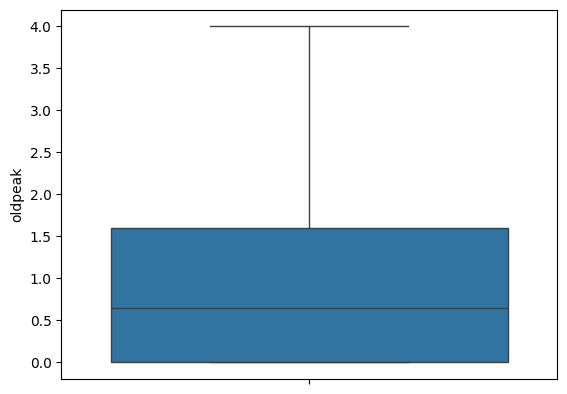

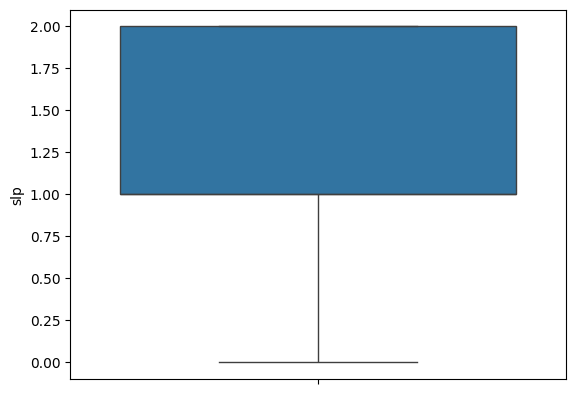

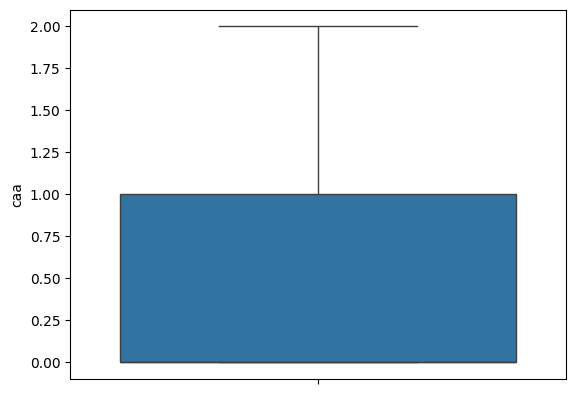

In [ ]:
plt.figure(figsize=(10,6)) # Adjust the figure size if needed

for col in col_name:
  sns.boxplot(data=data[col])
  plt.show()

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer =SimpleImputer(strategy='mean')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
x=data.drop('output',axis=1)
y=data['output']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
imputer.fit(x_train)

SimpleImputer()

In [ ]:
x_train_imputed=imputer.transform(x_train)
x_test_imputed=imputer.transform(x_test)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(x_train_imputed,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test_imputed)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [ ]:
print(mse)
print(r2)

0.1336972324096135
0.46185699345092146


In [ ]:
threshold=0.5
y_pred_binary=(y_pred>threshold).astype(int)
accuracy=accuracy_score(y_test,y_pred_binary)
print(accuracy)

0.8421052631578947
